In [1]:
## Trim down imports to only neccesary 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from transformers import AutoFeatureExtractor, ViTForImageClassification, ViTModel
import torch
from torchvision.transforms import v2
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('default')
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
from torch.utils.data import Subset
from collections import namedtuple
from sklearn.preprocessing import StandardScaler

import datasets_1 as datasets

import os
import datetime
import re







/Users/willhoff/Desktop/research_23_24/research_09_11/env/lib/python3.11/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/Users/willhoff/Desktop/research_23_24/research_09_11/env/lib/python3.11/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still cha

In [7]:
lvid_b = pd.read_excel('../data/HEID_LVID_brGDGTs.xlsx','LVID brGDGTs')

lvid_b.head()

# Function to clean column names
def clean_column_name(column_name):
    # Remove text within parentheses
    column_name = re.sub(r' \([^)]*\)', '', column_name)
    # Replace spaces with underscores
    column_name = column_name.replace(' ', '_')
    
    # Convert to lower case
    return column_name.lower().strip()

# Apply the function to each column name
lvid_b.columns = [clean_column_name(col) for col in lvid_b.columns]

lvid_b.rename(columns={'mbt\'-5me': "mbt"}, errors="raise", inplace=True)
# Now df has the cleaned column na mes
print(lvid_b.columns) 


,ID,Cum depth (cm),Prelim Age,MBT'-5Me,fIIIa
0,OG1515,3.0,0,0.173517,0.288740
1,OG1516,17.0,200,0.224310,0.227837
2,OG1517,31.0,400,0.220460,0.215906
3,OG1518,45.0,600,0.192314,0.228606
4,OG1469,59.0,800,0.198709,0.229131


Index(['id', 'cum_depth', 'prelim_age', 'mbt', 'fiiia'], dtype='object')


In [3]:
DATA_DIR = "../data/"

lvid_o = pd.read_excel('../data/LVID_bulk_geochem.xlsx')
lvid_o.head()

lvid_o.columns = lvid_o.columns.str.strip()

lvid_o.head()

print(lvid_o.columns)

# Function to clean column names
def clean_column_name(column_name):
    # Remove text within parentheses
    column_name = re.sub(r' \([^)]*\)', '', column_name)
    # Replace spaces with underscores
    column_name = column_name.replace(' ', '_')
    
    # Convert to lower case
    return column_name.lower().strip()


lvid_o.columns = [clean_column_name(col) for col in lvid_o.columns]


print(lvid_o.columns)

lvid_o.describe()


,Sample ID,Section depth (cm),Cum depth (cm),Age (BP),δ13CVPDB (‰),Total C (µg),%TOC,δ15NAir (‰),Total N (µg),%N,C/N,Sample Weight (mg) from Sample List,Sample mass (ug)
0,20LVID-02A-19,19.0,3.0,-4,-26.801533,1374.888037,7.014735,0.232224,131.049083,0.668618,10.491398,19.6,19600
1,20LVID-02A-22 5,22.5,6.5,58,-24.681210,1464.275417,7.213179,0.196497,135.527495,0.667623,10.804268,20.3,20300
2,20LVID-02A-26,26.0,10.0,127,-24.237128,1101.039173,4.186461,0.947665,100.056127,0.380442,11.004215,26.3,26300
3,20LVID-02A-29 5,29.5,13.0,201,-24.981566,1240.047631,2.966621,1.093422,108.097362,0.258606,11.471581,41.8,41800
4,20LVID-02A-33,33.0,17.0,287,-24.953268,1372.130105,4.848516,0.807939,120.690241,0.426467,11.369023,28.3,28300


,Sample ID,Section depth (cm),Cum depth (cm),Age (BP),δ13CVPDB (‰),Total C (µg),%TOC,δ15NAir (‰),Total N (µg),%N,C/N,Sample Weight (mg) from Sample List,Sample mass (ug)
0,20LVID-02A-19,19.0,3.0,-4,-26.801533,1374.888037,7.014735,0.232224,131.049083,0.668618,10.491398,19.6,19600
1,20LVID-02A-22 5,22.5,6.5,58,-24.681210,1464.275417,7.213179,0.196497,135.527495,0.667623,10.804268,20.3,20300
2,20LVID-02A-26,26.0,10.0,127,-24.237128,1101.039173,4.186461,0.947665,100.056127,0.380442,11.004215,26.3,26300
3,20LVID-02A-29 5,29.5,13.0,201,-24.981566,1240.047631,2.966621,1.093422,108.097362,0.258606,11.471581,41.8,41800
4,20LVID-02A-33,33.0,17.0,287,-24.953268,1372.130105,4.848516,0.807939,120.690241,0.426467,11.369023,28.3,28300


Index(['Sample ID', 'Section depth (cm)', 'Cum depth (cm)', 'Age (BP)',
       'δ13CVPDB (‰)', 'Total C (µg)', '%TOC', 'δ15NAir (‰)', 'Total N (µg)',
       '%N', 'C/N', 'Sample Weight (mg) from Sample List', 'Sample mass (ug)'],
      dtype='object')
Index(['sample_id', 'section_depth', 'cum_depth', 'age', 'δ13cvpdb', 'total_c',
       '%toc', 'δ15nair', 'total_n', '%n', 'c/n',
       'sample_weight_from_sample_list', 'sample_mass'],
      dtype='object')


,section_depth,cum_depth,age,δ13cvpdb,total_c,%toc,δ15nair,total_n,%n,c/n,sample_weight_from_sample_list,sample_mass
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,63.826667,362.603333,5066.813333,-21.634565,741.113416,5.157700,-0.739569,87.637395,0.618401,8.152921,15.844000,15844.000000
std,36.199206,235.335134,2700.912998,1.637360,298.100461,2.264667,0.931660,30.534376,0.260289,1.438938,7.426792,7426.792419
min,8.500000,3.000000,-4.000000,-34.868342,47.825859,0.185372,-2.490998,9.584512,0.040582,3.858221,6.800000,6800.000000
25%,33.000000,133.375000,2793.250000,-21.852532,653.330397,3.951033,-1.262207,77.671604,0.451463,7.732681,11.700000,11700.000000
50%,60.500000,361.000000,5645.500000,-21.278198,757.339882,5.735836,-0.998697,94.190983,0.688001,8.211551,13.400000,13400.000000
75%,90.000000,590.125000,7425.250000,-20.809372,915.712166,6.686495,-0.494918,107.725388,0.812283,8.878720,16.850000,16850.000000
max,155.000000,724.500000,9055.000000,-19.391919,1464.275417,10.719894,2.959212,137.447915,1.069600,11.471581,56.700000,56700.000000


In [9]:
class ImageData:
    def __init__(self, name, image):
        self.name = name
        self.image = image
        self.start = None
        self.end = None

4ILLUME-LVID20-1B-4B-1-A.jpg 4


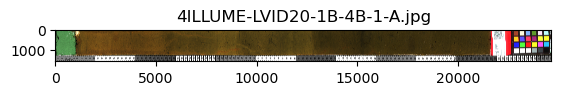

2ILLUME-LVID20-1B-2B-1-A.jpg 2


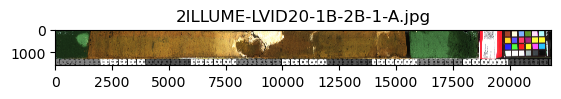

1ILLUME-LVID20-1B-1B-1-A.jpg 1


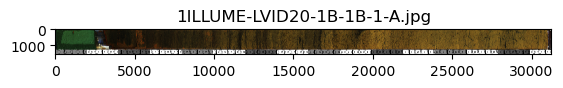

6ILLUME-LVID20-1A-5B-1-A.jpg 6


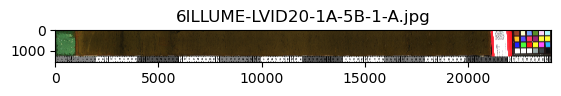

8ILLUME-LVID20-1A-7B-1-A.jpg 8


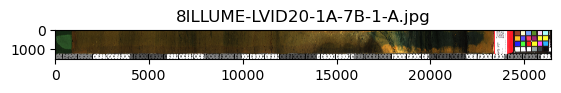

3ILLUME-LVID20-1B-3B-1-A.jpg 3


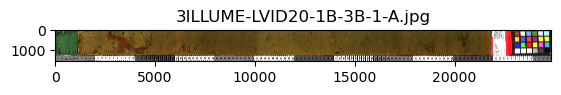

5ILLUME-LVID20-1A-4B-1-A.jpg 5


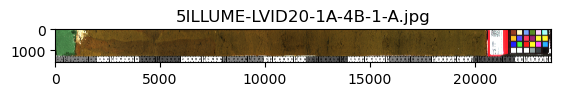

7ILLUME-LVID20-1A-6B-1-A.jpg 7


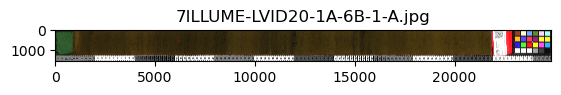

9ILLUME-LVID20-1A-8B-1-A.jpg 9


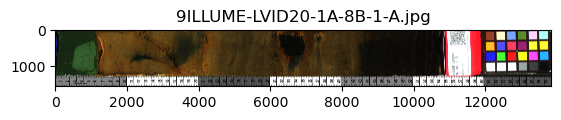

In [141]:
full_LVID = []
cropped_LVID = []

def sortimg(img):
    return img.name

def load_and_display_images(folder_path, img_store):
    # List all files in the folder
    files = os.listdir(folder_path)

    for file in files:
        # Construct full file path
        file_path = os.path.join(folder_path, file)
        obj_name = file[0]
        print(file,obj_name)
        # Check if the file is an image 
        if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Open the image
            img = Image.open(file_path)

            new_img = ImageData(name = obj_name, image = img)
            
            # Display the image
            plt.imshow(img)
            plt.title(file)
            plt.show()
            
            img_store.append(new_img)


load_and_display_images('img_data/LVID',full_LVID)
## reverse = False because 1B-7B seems darkest so would make sense for it to be on the bottom
full_LVID.sort(key=sortimg,reverse=False)

[<__main__.ImageData object at 0x28fde7f90>, <__main__.ImageData object at 0x2acf21310>, <__main__.ImageData object at 0x2b9ee2c90>, <__main__.ImageData object at 0x2aca76f10>, <__main__.ImageData object at 0x2b9ff41d0>, <__main__.ImageData object at 0x2b9ece9d0>, <__main__.ImageData object at 0x2ba03ac90>, <__main__.ImageData object at 0x2acf1fc90>, <__main__.ImageData object at 0x2ba07d1d0>]


<Figure size 1000x500 with 0 Axes>

<Axes: >

(-0.5, 31236.5, 1565.5, -0.5)

Text(0.5, 1.0, 'Image 1')

"# Display the second image\nplt.subplot(1, 2, 2)  # (rows, columns, panel number)\nplt.imshow(image2)\nplt.axis('off')  # Hide the axis\nplt.title('1B-4B')"

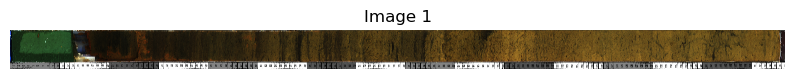

In [135]:
print(full_LVID)
# Set up the figure and subplots
plt.figure(figsize=(10, 5))  # The figure size can be adjusted as needed

image = full_LVID[0]
# Display the first image
plt.subplot(1, 1, 1)  # (rows, columns, panel number)
plt.imshow(image.image)
plt.axis('off')  # Hide the axis
plt.title(f'Image {image.name}')

'''# Display the second image
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
plt.imshow(image2)
plt.axis('off')  # Hide the axis
plt.title('1B-4B')'''

# Show the plot
plt.show()




In [ ]:
##### CROPPING IMAGES --- IDK HOW TO DO THIS NOT MANUALLY



(-0.5, 27874.5, 1299.5, -0.5)

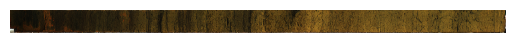

In [142]:
## Cropping Unnecesary parts
# Left, top, right, bottom

## This is only guessing, do something better potentially. More fine grain
## 1. 3200 0 31075 1300
    ## 17-156 cm
start = 3200
end = 31075
box = (start, 0, end, 1300)

# Crop the image
cropped_image = full_LVID[0].image.crop(box)
full_LVID[0].start = start
full_LVID[0].end = end

# Display the cropped image
plt.imshow(cropped_image)
plt.axis('off')  # This hides the axis
plt.show()

cropped_LVID.append(ImageData(full_LVID[0].name,cropped_image))



(-0.5, 14124.5, 1299.5, -0.5)

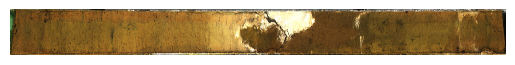

In [143]:
## Cropping Unnecesary parts
# Left, top, right, bottom

## This is only guessing, do something better potentially. More fine grain
## 2. 1400 0 15525 1300
    ## 8-78 cm 
start = 1400
end = 15525
box = (start, 0, end, 1300)
full_LVID[1].start = start
full_LVID[1].end = end

# Crop the image
cropped_image = full_LVID[1].image.crop(box)

# Display the cropped image
plt.imshow(cropped_image)
plt.axis('off')  # This hides the axis
plt.show()


cropped_LVID.append(ImageData(full_LVID[1].name,cropped_image))




(-0.5, 20649.5, 1299.5, -0.5)

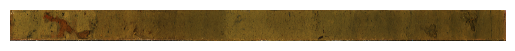

In [144]:
## Cropping Unnecesary parts
# Left, top, right, bottom

## This is only guessing, do something better potentially. More fine grain
## 3. 1200 0 21850 1300
    ## 7-109.5 cm
start = 1200
end = 21850
box = (start, 0, end, 1300)

# Crop the image
cropped_image = full_LVID[2].image.crop(box)
full_LVID[2].start = start
full_LVID[2].end = end

# Display the cropped image
plt.imshow(cropped_image)
plt.axis('off')  # This hides the axis
plt.show()

cropped_LVID.append(ImageData(full_LVID[2].name,cropped_image))



(-0.5, 20649.5, 1299.5, -0.5)

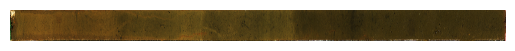

In [145]:
## Cropping Unnecesary parts
# Left, top, right, bottom

## This is only guessing, do something better potentially. More fine grain
## 4. 1000 0 21650 1300
    ## 6-108.5 cm
start = 1000
end = 21650
box = (start, 0, end, 1300)

# Crop the image
cropped_image = full_LVID[3].image.crop(box)
full_LVID[3].start = start
full_LVID[3].end = end

# Display the cropped image
plt.imshow(cropped_image)
plt.axis('off')  # This hides the axis
plt.show()


cropped_LVID.append(ImageData(full_LVID[3].name,cropped_image))




(-0.5, 19599.5, 1299.5, -0.5)

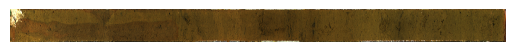

In [146]:
## Cropping Unnecesary parts
# Left, top, right, bottom

## This is only guessing, do something better potentially. More fine grain
## 5. 1000 0 20600 1300
    ## 6-103.5 cm
start = 1000
end = 20600
box = (start, 0, end, 1300)

# Crop the image
cropped_image = full_LVID[4].image.crop(box)
full_LVID[4].start = start
full_LVID[4].end = end

# Display the cropped image
plt.imshow(cropped_image)
plt.axis('off')  # This hides the axis
plt.show()


cropped_LVID.append(ImageData(full_LVID[4].name,cropped_image))



(-0.5, 20149.5, 1299.5, -0.5)

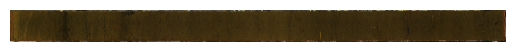

In [147]:
## Cropping Unnecesary parts
# Left, top, right, bottom

## This is only guessing, do something better potentially. More fine grain
## 6. 1000 0 21150 1300
    ## 6-106 cm
start = 1000
end = 21150
box = (start, 0, end, 1300)

# Crop the image
cropped_image = full_LVID[5].image.crop(box)
full_LVID[5].start = start
full_LVID[5].end = end

# Display the cropped image
plt.imshow(cropped_image)
plt.axis('off')  # This hides the axis
plt.show()

cropped_LVID.append(ImageData(full_LVID[5].name,cropped_image))



(-0.5, 20999.5, 1299.5, -0.5)

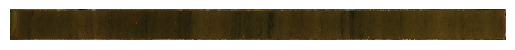

In [148]:
## Cropping Unnecesary parts
# Left, top, right, bottom

## This is only guessing, do something better potentially. More fine grain
## 7. 900 0 21900 1300
    ## 5.5-110 cm
start = 900
end = 21900
box = (start, 0, end, 1300)

# Crop the image
cropped_image = full_LVID[6].image.crop(box)
full_LVID[6].start = start
full_LVID[6].end = end

# Display the cropped image
plt.imshow(cropped_image)
plt.axis('off')  # This hides the axis
plt.show()


cropped_LVID.append(ImageData(full_LVID[6].name,cropped_image))





(-0.5, 20999.5, 1299.5, -0.5)

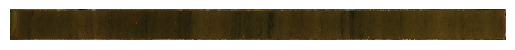

In [149]:
## Cropping Unnecesary parts
# Left, top, right, bottom

## This is only guessing, do something better potentially. More fine grain
## 8. 900 0 21900 1300
    ## 5.5-110 cm
start = 900
end = 21900
box = (start, 0, end, 1300)

# Crop the image
cropped_image = full_LVID[7].image.crop(box)
full_LVID[7].start = start
full_LVID[7].end = end

# Display the cropped image
plt.imshow(cropped_image)
plt.axis('off')  # This hides the axis
plt.show()


cropped_LVID.append(ImageData(full_LVID[7].name,cropped_image))




(-0.5, 20999.5, 1299.5, -0.5)

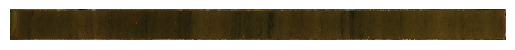

In [150]:
## Cropping Unnecesary parts
# Left, top, right, bottom

## This is only guessing, do something better potentially. More fine grain
## 9. 900 0 21900 1300
    ## 5.5-110 cm
start = 900
end = 21900
box = (start, 0, end, 1300)

# Crop the image
cropped_image = full_LVID[8].image.crop(box)
full_LVID[8].start = start
full_LVID[8].end = end

# Display the cropped image
plt.imshow(cropped_image)
plt.axis('off')  # This hides the axis
plt.show()

cropped_LVID.append(ImageData(full_LVID[8].name,cropped_image))



In [160]:
  ################################################################################################################                       
                            ####################### TARGET LABEL #######################
  ################################################################################################################ 


#['sample_id', 'section_depth', 'cum_depth', 'age', 'δ13cvpdb', 'total_c',
        #'%toc', 'δ15nair', 'total_n', '%n', 'c/n',
       #'sample_weight_from_sample_list', 'sample_mass']

target = '%toc'
scaled = True
sample_df = lvid_o
br = False
if br:
    target = 'MBT'
    sample_df = df

if scaled:
    target_col = target + '_scaled'
else:
    target_col = target






## 997 is good chunk size

## Images loaded, tabular loaded, Link together



full_depth = 0
chunk_size = 997
chunks = []
chunk_labels = []

## Pixels to cm
    ## To make sure our depths are accurate
p_to_cm = 5/997


if scaled:
    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler to the target column and transform it
    sample_df[target_col] = scaler.fit_transform(sample_df[[target]])



j = 0
for i,object in enumerate(full_LVID):
    full_end = object.end
    start_pixel = object.start
    end_pixel = object.start + chunk_size
    while end_pixel <= full_end:
        box = (start_pixel, 0, end_pixel, 1300)
            
        ## Adding on labels
        section_data =  sample_df[( sample_df['cum_depth'] >= full_depth) & 
                        ( sample_df['cum_depth'] < (full_depth+5))]

        # Calculate the average target value for the segment
        average_target = section_data[target_col].mean()
        #print(f"target for section {full_depth} to {full_depth + 5}: {average_target}\n")
        if len(section_data) > 0:
            chunk_labels.append(average_target)
            chunk = object.image.crop(box)

            chunks.append(chunk) 

        ## Looks good, dont need to display for now
        # Display the chunk
        #plt.figure()  # Create a new figure for each chunk
        #plt.imshow(chunk)
        #plt.axis('off')  # Hide the axis
        #plt.title(f'Chunk {j+1}')
        #plt.show()
        
        
        ## While loop Increments
        start_pixel += chunk_size
        end_pixel += chunk_size
        j += 1
        if end_pixel > full_end:
            full_depth += (full_end - (end_pixel - chunk_size)) * p_to_cm
        else:
            full_depth += 5
            
    #print(f"\n end of image {i}\n")
        
print(len(chunks))       
        
 # Convert your lists to numpy arrays
images_array = np.array(chunks)
labels_array = np.array(chunk_labels)

# Create boolean masks
nan_mask = np.isnan(labels_array)
non_nan_mask = ~nan_mask

# Filter the arrays
images_test = images_array[nan_mask]
images_known = images_array[non_nan_mask]
labels_test = labels_array[nan_mask]
labels_known = labels_array[non_nan_mask]


feature_extractor = AutoFeatureExtractor.from_pretrained('facebook/deit-tiny-patch16-224')
inputs = feature_extractor(images=images_known, return_tensors="pt")

print(inputs['pixel_values'][0].shape)


class CustomDataset(Dataset):
    def __init__(self, pixel_values, labels):
        self.pixel_values = pixel_values
        self.labels = labels

    def __len__(self):
        return len(self.pixel_values)

    def __getitem__(self, idx):
        image = self.pixel_values[idx]
        label = self.labels[idx]
        return image, label

# Assuming pixel_values already a tensor in the shape [num_images, channels, height, width]
pixel_values_tensor = inputs['pixel_values'] 
labels_tensor = torch.tensor(labels_known, dtype=torch.float32)


dataset = CustomDataset(pixel_values_tensor, labels_tensor)


train_indices, val_indices = train_test_split(range(len(labels_tensor)), test_size=0.2, random_state=42)

# Subset for train and validation
train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)

# Create a dataloader for both the training and validation sets
    ## 5 seems like a fine batch size
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=5, shuffle=False)

126


/Users/willhoff/Desktop/research_23_24/research_09_11/env/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


torch.Size([3, 224, 224])


In [161]:
## Pretrained model

class CustomViTEmbeddingModel(torch.nn.Module):
    def __init__(self, original_model):
        super(CustomViTEmbeddingModel, self).__init__()
        
        # Extract the necessary layers from the original model
        self.embeddings = original_model.vit.embeddings  #.patch_embeddings
        self.encoder_layer_0 = original_model.vit.encoder.layer[0]
        self.encoder_layer_1 = original_model.vit.encoder.layer[1]
        
        # Assume a square grid of patches to reshape the sequence of patches back into a 2D grid
            ## image: 224x224 ; patch size: 16x16 --> 14x14 
        self.num_patches_side = 14

    def forward(self, x):
        # Apply the embeddings layer
        x = self.embeddings(x)
        
        # Pass the result through the first and second encoder layers
        x = self.encoder_layer_0(x)[0]  # [0] to get the hidden states
        x = self.encoder_layer_1(x)[0]  # [0] to get the hidden states
        
        # x is now the sequence of embeddings for the patches
            # The output x will be a sequence of embeddings, one for each patch of the input images.
            # If you're looking for a single vector representation per image, typically the class token embedding (the first token) is used. 
            # If the model doesn't use a class token, you might need to apply a different pooling strategy over the patch embeddings.
        
        ## Updating to reshape
        
        # Before reshaping, x is in shape [batch_size, num_patches+1, embedding_dim]
        # We discard the first token which is used for classification in the original ViT model
        x = x[:, 1:, :]  # Now in shape [batch_size, num_patches, embedding_dim]
        
        # Reshape to [batch_size, num_patches_side, num_patches_side, embedding_dim]
        x = x.reshape(-1, self.num_patches_side, self.num_patches_side, x.size(-1))

        # Permute to get [batch_size, embedding_dim, num_patches_side, num_patches_side]
        # This is a pseudo-spatial 2D grid, where embedding_dim becomes the channel dimension
        x = x.permute(0, 3, 1, 2)
        
        return x

# Load the pre-trained ViT model
pretrained_vit = ViTForImageClassification.from_pretrained('facebook/deit-tiny-patch16-224')

## Freeze params
for param in pretrained_vit.parameters():
    param.requires_grad = False

# Create model w first three layers and create embedding
custom_model = CustomViTEmbeddingModel(pretrained_vit)
embeddings = custom_model(inputs['pixel_values']) 

print(embeddings[0].shape)


torch.Size([192, 14, 14])


In [171]:
## Adding in CNN component


## CNN for regression
class RegressionCNN(nn.Module):
    ## Maybe try messing w/ kernel_size, padding and stride?
    def __init__(self, embedding_dim):
        super(RegressionCNN, self).__init__()
        
        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=embedding_dim, out_channels=256, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(256)
        self.relu1 = nn.ReLU()

        # Second convolutional layer
            ## Same amount? Dropout should help it to learn other things
        self.conv2 = nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu2 = nn.ReLU()
        
        # Third convolutional layer -- new
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        
        '''# Fourth convolutional layer -- new
        self.conv4 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU()
        
        # Max Pooling layer
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fifth convolutional layer reducing to 16 output dimensions
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=16, kernel_size=1)  # 1x1 convolution
        self.bn5 = nn.BatchNorm2d(16)
        self.relu5 = nn.ReLU()'''
        
        
        self.dropout = nn.Dropout(p=0.5)

        # Adaptive pooling layer to pool down to 1x1
        self.adapt_pool = nn.AdaptiveAvgPool2d((1, 1))
        
        # Final fully connected layer for regressin
        self.fc = nn.Linear(in_features=64, out_features=1)

    def forward(self, x):
        # Apply first convolution, batch norm, and activation
        x = self.relu1(self.bn1(self.conv1(x)))
        #x = self.relu1(self.conv1(x))
        
        # Apply second convolution, batch norm, and activation
        x = self.relu2(self.bn2(self.conv2(x)))
        #x = self.relu2(self.conv2(x))
        
        # Apply third convolution, batch norm, and activation -- new
        x = self.relu3(self.bn3(self.conv3(x)))
        #x = self.relu3(self.conv3(x))
        
        # Apply fourth convolution, batch norm, and activation -- new
        #x = self.relu4(self.bn4(self.conv4(x)))
        
        # Apply max pooling after the fourth convolutional layer
        #x = self.maxpool(x)

        # Apply fifth convolutional layer
        #x = self.relu5(self.bn5(self.conv5(x)))
        
        # Apply dropout
        x = self.dropout(x)

        # Pool the output from the convolutional layers
        x = self.adapt_pool(x)

        # Flatten the tensor for the fully connected layer
        x = torch.flatten(x, start_dim=1)
        
        # Fully connected layer for regression
        x = self.fc(x)
        return x

def calculate_rmse_and_r2(loader, model, scaler):
    model.eval()
    targets, predictions = [], []
    with torch.no_grad():
        for batch in loader:
            images, labels = batch
            embeddings = custom_model(images)  # Get embeddings from the ViT
            preds = cnn_model(embeddings)  # Pass embeddings to the CNN
            predictions.extend(preds.view(-1).tolist())
            targets.extend(labels.tolist())

    # Scale the targets using the provided scaler
    targets_scaled = scaler.transform(np.array(targets).reshape(-1, 1)).flatten()

    # Convert to tensors
    predictions = torch.tensor(predictions)
    targets_scaled = torch.tensor(targets_scaled)

    # Calculate RMSE on scaled targets
    rmse_value = torch.sqrt(nn.functional.mse_loss(predictions, targets_scaled))

    # Calculate R^2 on scaled targets
    r2_value = r2_score(targets_scaled, predictions)

    return rmse_value.item(), r2_value








In [163]:
def count_layers(model):
    layer_count = 0
    for child in model.children():
        if isinstance(child, nn.Module):
            # If the child is a container module (like nn.Sequential), recursively count its children
            if isinstance(child, nn.Sequential) or isinstance(child, nn.ModuleList):
                layer_count += count_layers(child)
            else:
                layer_count += 1
    return layer_count

def count_conv2d_layers(model):
    layer_count = 0
    for child in model.children():
        # Check if the child is a convolutional layer
        if isinstance(child, nn.Conv2d):
            layer_count += 1
        # If the child is a container module, recursively count its Conv2d children
        elif isinstance(child, nn.Sequential) or isinstance(child, nn.ModuleList):
            layer_count += count_conv2d_layers(child)
    return layer_count

# Example usage:

In [164]:
## Preventing model arch from printing everytime
InteractiveShell.ast_node_interactivity = "last_expr"
warnings.filterwarnings('ignore')

Epoch 1/50
Train Loss: 1.0796, Train RMSE: 2.1020, Train R2: -20.9264
Val RMSE: 2.0633, Val R2: -26.7055
Epoch 2/50
Train Loss: 0.8824, Train RMSE: 1.6537, Train R2: -12.5698
Val RMSE: 1.8676, Val R2: -21.6998
Epoch 3/50
Train Loss: 0.6304, Train RMSE: 2.0452, Train R2: -19.7576
Val RMSE: 2.2046, Val R2: -30.6307
Epoch 4/50
Train Loss: 0.6000, Train RMSE: 2.6572, Train R2: -34.0363
Val RMSE: 2.7677, Val R2: -48.8511
Epoch 5/50
Train Loss: 0.6157, Train RMSE: 1.9773, Train R2: -18.4013
Val RMSE: 2.1736, Val R2: -29.7469
Epoch 6/50
Train Loss: 0.5785, Train RMSE: 2.3721, Train R2: -26.9234
Val RMSE: 2.5812, Val R2: -42.3598
Epoch 7/50
Train Loss: 0.4917, Train RMSE: 2.2161, Train R2: -23.3696
Val RMSE: 2.3555, Val R2: -35.1098
Epoch 8/50
Train Loss: 0.3576, Train RMSE: 2.5873, Train R2: -32.2176
Val RMSE: 2.8892, Val R2: -53.3262
Epoch 9/50
Train Loss: 0.2840, Train RMSE: 2.1182, Train R2: -21.2645
Val RMSE: 2.3547, Val R2: -35.0859
Epoch 10/50
Train Loss: 0.3411, Train RMSE: 2.1668, Tra

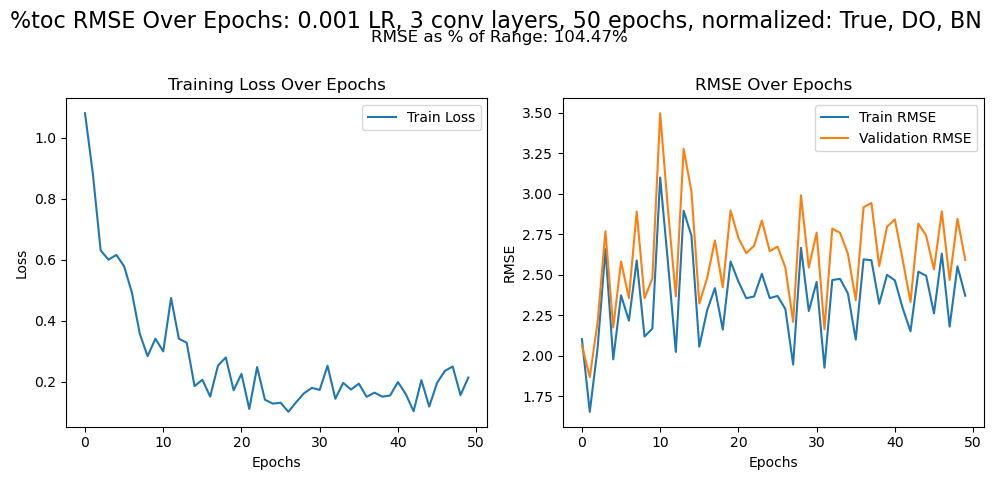

In [172]:
############################################ ############################################ ############################################ 
############################################ ############################################ ############################################ 
###############################################       TRAINING          ############################################ 
############################################ ############################################ ############################################ 
############################################ ############################################ ############################################ 


# Training loop
num_epochs = 50
## Started w 0.001, went up to 0.01
lr = 0.001

# Training loop
train_losses = []
train_rmses = []
val_rmses = []

# Instantiate the last model
cnn_model = RegressionCNN(embedding_dim=192)

layers = count_conv2d_layers(cnn_model)

# Define a Loss Function and Optimizer
loss_function = nn.MSELoss()


optimizer = optim.Adam(cnn_model.parameters(), lr=lr)

for epoch in range(num_epochs):
    cnn_model.train()
    train_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        images, labels = batch
        embeddings = custom_model(images)  # Get embeddings from the ViT
        predictions = cnn_model(embeddings)  # Pass embeddings to the CNN
        loss = loss_function(predictions.squeeze(), labels) 
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    
    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    
    train_rmse, train_r2 = calculate_rmse_and_r2(train_loader, cnn_model,scaler)
    val_rmse, val_r2 = calculate_rmse_and_r2(val_loader, cnn_model,scaler)
    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)
    
    # Print out the metrics
    print(f'Epoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {avg_train_loss:.4f}, Train RMSE: {train_rmse:.4f}, Train R2: {train_r2:.4f}')
    print(f'Val RMSE: {val_rmse:.4f}, Val R2: {val_r2:.4f}')

# Plotting
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot RMSE
plt.subplot(1, 2, 2)
plt.plot(train_rmses, label='Train RMSE')
plt.plot(val_rmses, label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE Over Epochs')
plt.legend()

# Add an overall title to the plot
    ## No BN, No dropout
range_target = np.max(sample_df[target]) - np.min(sample_df[target])
if scaled:
    normal_rmse = scaler.inverse_transform([[val_rmse]])[0, 0]
    rmse_perc = (normal_rmse / range_target) * 100
else:
    rmse_perc = (val_rmse / range_target) * 100
main_title = f'{target} RMSE Over Epochs: {lr} LR, {layers} conv layers, {num_epochs} epochs, normalized: {scaled}, DO, BN '
subtitle = f'RMSE as % of Range: {rmse_perc:.2f}%'
plt.suptitle(main_title, fontsize=16)

# Position the subtitle. Adjust the x and y coordinates and fontsize as needed.
plt.figtext(0.5, 0.94, subtitle, ha='center', va='top', fontsize=12)

# Adjust layout to make room for the overall title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### 0.0001 seems best

timestamp = datetime.datetime.now().strftime("%Y_%m_%d-%H-%M-%S")
save_dir = 'test_results/LVID'

# Saving the plot
# Ensure the target directory exists
os.makedirs(save_dir, exist_ok=True)
filename = f'{target}2_rmse_plot_{timestamp}.png'

if target == "C/N":
   filename = f'CN_rmse_plot_{timestamp}.png' 

plt.savefig(os.path.join(save_dir, filename))

plt.show()



In [115]:
range_target = np.max(lvid_o[target_col]) - np.min(lvid_o[target_col])
rmse_percentage = (val_rmse / range_target) * 100
print(rmse_percentage)

79.44852013863441
